# Linear Models for Classification

# Exercise
Load and preprocess the adult data as before.
include dummy encoding and scaling
Learn a logistic regression model and visualize the coefficients.
Then grid-search the regularization parameter C.
compare L1 penalty to L2 penalty. how are the coefficients different?
which are the most important features?

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data = pd.read_csv("data/adult.csv", index_col=0)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
income = data.income
data_features = data.drop("income", axis=1)
display(data_features.head())

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
### one hot encode data
data_one_hot = pd.get_dummies(data_features)
data_one_hot.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
### Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lgaalves/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  import sys


In [6]:
### Cross-validation with default parameters
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train_scaled, y_train, cv=5)
print(scores.mean())

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.8475429975429976


In [11]:
### do grid search
import numpy as np

param_grid = {'C': np.logspace(-3, 3, 7)}
param_grid

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid.fit(X_train_scaled, y_train)

grid.best_params_,grid.best_score_

({'C': 0.1}, 0.8478296478296479)

In [23]:
param_grid

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

Text(0, 0.5, 'Score')

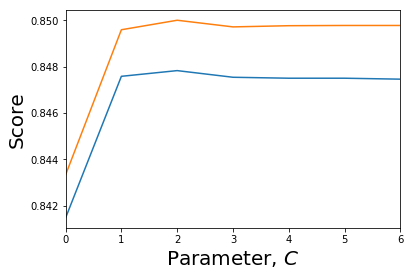

In [22]:
# some visualization
import pandas as pd
%matplotlib inline
res = pd.DataFrame(grid.cv_results_)
res.mean_test_score.plot()
res.mean_train_score.plot()
plt.xlabel('Parameter, $C$',fontsize=20)
plt.ylabel('Score',fontsize=20)

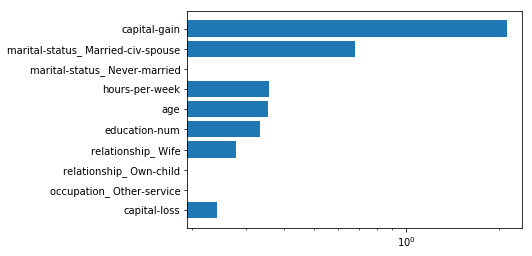

In [14]:
import matplotlib.pyplot as plt
plt.xscale("log")
grid.score(X_test, y_test)
important = np.argsort(np.abs(grid.best_estimator_.coef_)).ravel()
plt.barh(range(10), grid.best_estimator_.coef_.ravel()[important[-10:]])
plt.yticks(range(10), X_train.columns[important[-10:]]);

In [24]:
# %load solutions/adult_classification.py